In [117]:
import warnings
# Uyarıları kapat
warnings.filterwarnings("ignore")


In [118]:
import pandas as pd

# Veri setini oku
df = pd.read_csv("/content/drive/MyDrive/insurance.csv")

# Veri setindeki ilk 5 satırı incele
display(df.head())


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Kategorik ve numerical değişkenleri belirliyoruz

In [119]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


Numerical değerlerin analizlerini inceliyoruz.

In [120]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


- Ortalama BMI 30.66 ve standart sapma 6.1 ile veri setindeki bireylerin çoğunun fazla kilolu olduğu görülüyor.
- Ortalama harcama 13,270 ancak standart sapma 12,110 ile aşırı değişkenlik gösteriyor. Medyan ortalamadan çok düşük, bu da verilerin sağa çarpık olduğunu (yüksek harcamalı az sayıda outlier) işaret ediyor.



In [121]:
#Numeric ve kategorik değişkenleri ayırdık

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns


In [122]:
#Numeric değişkenleri modele hazırlamak için scaling yapıyoruz
from sklearn.preprocessing import StandardScaler

# Scaler nesnesini oluştur
scaler = StandardScaler()

# Scaling uygula
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [123]:
#Kategorik değişkenlere modele hazırlamak için one-hot encoding uyguluyoruz.
df= pd.get_dummies(df, columns=categorical_columns, drop_first=True)

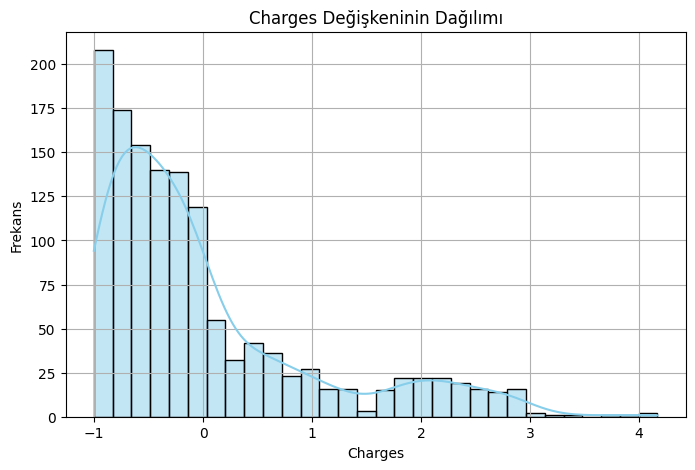

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dağılım grafiği (histogram)
plt.figure(figsize=(8, 5))
sns.histplot(df['charges'], kde=True, bins=30, color='skyblue')
plt.title('Charges Değişkeninin Dağılımı')
plt.xlabel('Charges')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()


Grafik sağa çarpık bir dağılıma sahip. Bu, veri setinde düşük Charges değerlerinin daha sık görüldüğünü, yüksek değerlerin ise nadiren ortaya çıktığını gösterir.

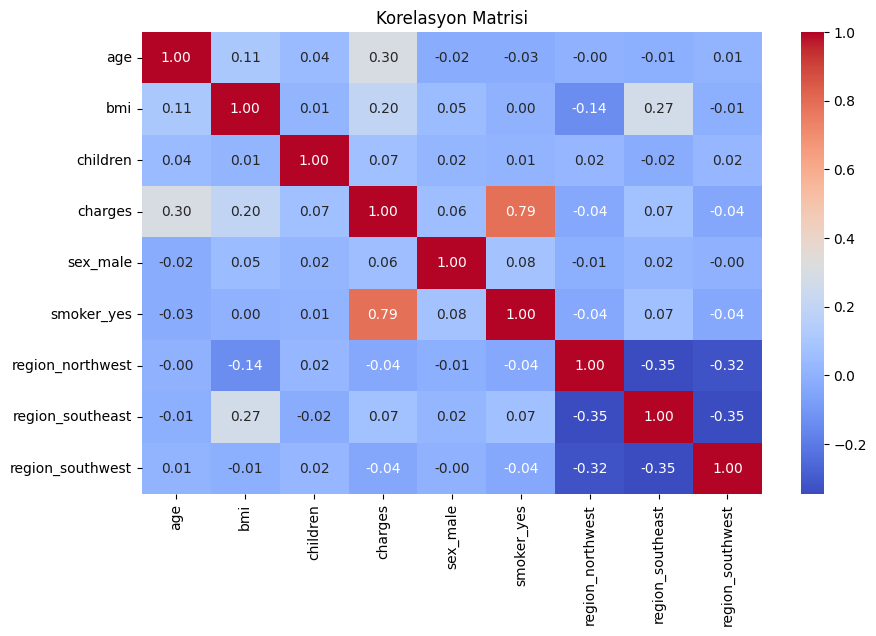

In [125]:
# Korelasyon matrisi ve görselleştirme
plt.figure(figsize=(10, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()


charges en yüksek korelasyonu smoker_yes (sigara içen) ile göstermekte (0.79). Bu, sigara içen bireylerin sigorta ücretlerinin ciddi şekilde daha yüksek olduğunu gösteriyor.

age ve charges arasında da orta düzeyde pozitif bir korelasyon var (0.30). Yaş arttıkça sigorta ücretinin de arttığını söyleyebiliriz.

bmi ile charges arasında da pozitif ama zayıf bir ilişki var (0.20).

erkek olma durumu ile charges arasında çok düşük bir ilişki var (0.06), cinsiyetin sigorta ücreti üzerinde çok etkili olmadığını gösteriyor.



In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Bağımlı ve bağımsız değişkenleri ayır
X = df.drop('charges', axis=1)  # Bağımsız değişkenler
y = df['charges']  # Bağımlı değişken

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standartlaştırma
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lineer regresyon
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Performans ölçümleri
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Lineer Regresyon (Polinom Eklenmeden):")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"R^2 Skoru: {r2_lr:.2f}\n")

Lineer Regresyon (Polinom Eklenmeden):
Mean Squared Error (MSE): 0.23
R^2 Skoru: 0.78



Buradaki 0.23 değeri, modelin tahminlerinin ortalama hata karelerinin 0.23 olduğu anlamına gelir. Düşük bir MSE değeri, modelin doğru tahminler yaptığını gösterir.

R², modelin hedef değişkeni (bağımlı değişken) açıklama gücünü gösterir. Buradaki 0.78 skoru, modelin verideki varyansın %78'ini başarıyla açıkladığını ifade eder. 1'e ne kadar yakınsa o kadar iyidir

In [127]:
import numpy as np


# Logaritmik dönüşüm uygulama
df['log_charges'] = np.log(df['charges'])

# Bağımlı değişkeni değiştirme
y_log = df['log_charges']

# Veriyi eğitim ve test olarak bölme
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Özellikleri ölçeklendir (Standardizasyon)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lineer regresyon modelini kur
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Test verisi ile tahmin yap
y_pred_log = model.predict(X_test_scaled)

# MSE ve R² skorlarını hesapla
mse_log = mean_squared_error(y_test, y_pred_log)
r2_log = r2_score(y_test, y_pred_log)


ValueError: Input y contains NaN.

In [128]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Veriyi eğitim ve test olarak bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri ölçeklendir (Standardizasyon)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polinomsal regresyon ve farklı dereceler için MSE'yi hesapla
mse_values = []
r2_values = []

for degree in range(1, 6):
    # Polinomsal özellikleri oluştur
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    # Polinomsal regresyon modelini kur
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Tahmin yap
    y_pred = model.predict(X_test_poly)

    # MSE ve R² hesapla
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_values.append(mse)
    r2_values.append(r2)

# Dereceye göre MSE ve R² sonuçlarını yazdır
for degree in range(1, 6):
    print(f"Degree {degree} - MSE: {mse_values[degree-1]}, R²: {r2_values[degree-1]}")

# En iyi dereceyi seçme
best_degree = np.argmin(mse_values) + 1
print(f"En iyi derece: {best_degree}")

Degree 1 - MSE: 0.22926355667538661, R²: 0.7835929767120722
Degree 2 - MSE: 0.1413430801364756, R²: 0.866583090316484
Degree 3 - MSE: 0.16035058270834912, R²: 0.8486414814914021
Degree 4 - MSE: 0.26039155152980703, R²: 0.7542105628428458
Degree 5 - MSE: 1.3386874623154852, R²: -0.2636171794314053
En iyi derece: 2


Linear modele göre derece 2de R^2 kare arttı ve MSE'si düştü, modelin performansı daha iyi

In [129]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Veriyi eğitim ve test olarak bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri ölçeklendir (Standardizasyon)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polinomsal özellikleri oluştur
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Ridge ve Lasso modellerini eğit
ridge = Ridge(alpha=1.0)  # Ridge Regresyonu (alpha: regularization parametresi)
lasso = Lasso(alpha=0.1)  # Lasso Regresyonu (alpha: regularization parametresi)

# Ridge modelini eğit
ridge.fit(X_train_poly, y_train)
y_pred_ridge = ridge.predict(X_test_poly)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Lasso modelini eğit
lasso.fit(X_train_poly, y_train)
y_pred_lasso = lasso.predict(X_test_poly)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Polinomsal regresyon modelini eğit
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Sonuçları yazdır
print(f"Ridge Modeli - MSE: {mse_ridge}, R²: {r2_ridge}")
print(f"Lasso Modeli - MSE: {mse_lasso}, R²: {r2_lasso}")
print(f"Polinomsal Model - MSE: {mse_poly}, R²: {r2_poly}")


Ridge Modeli - MSE: 0.14133476849810553, R²: 0.8665909358587254
Lasso Modeli - MSE: 0.17826078089221623, R²: 0.8317356429374124
Polinomsal Model - MSE: 0.1413430801364756, R²: 0.866583090316484


Ridge ve polinomsal hemen hemen aynı sonuçları verdi, ikisi de iyi model ikisi de kullanılabilir

In [130]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Veriyi eğitim ve test olarak bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri ölçeklendir (Standardizasyon)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polinomsal özellikleri oluştur
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Alpha değerleri için aralık belirle
alphas = np.logspace(-3, 2, 50)  # 0.001 ile 100 arasında

# Ridge ve Lasso modellerini test et
ridge_mse = []
lasso_mse = []
ridge_r2 = []
lasso_r2 = []

for alpha in alphas:
    # Ridge modelini eğit
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_poly, y_train)
    y_pred_ridge = ridge.predict(X_test_poly)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)

    ridge_mse.append(mse_ridge)
    ridge_r2.append(r2_ridge)

    # Lasso modelini eğit
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_poly, y_train)
    y_pred_lasso = lasso.predict(X_test_poly)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    r2_lasso = r2_score(y_test, y_pred_lasso)

    lasso_mse.append(mse_lasso)
    lasso_r2.append(r2_lasso)

# En iyi alpha değerlerini ve sonuçlarını yazdır
best_ridge_alpha = alphas[np.argmin(ridge_mse)]
best_lasso_alpha = alphas[np.argmin(lasso_mse)]

print(f"En iyi Ridge alpha değeri: {best_ridge_alpha}")
print(f"En iyi Lasso alpha değeri: {best_lasso_alpha}")

# En iyi alpha değerleriyle eğitilmiş modellerin sonuçlarını yazdır
print(f"Ridge - MSE: {ridge_mse[np.argmin(ridge_mse)]}, R²: {ridge_r2[np.argmin(ridge_r2)]}")
print(f"Lasso - MSE: {lasso_mse[np.argmin(lasso_mse)]}, R²: {lasso_r2[np.argmin(lasso_r2)]}")


En iyi Ridge alpha değeri: 12.067926406393289
En iyi Lasso alpha değeri: 0.004094915062380427
Ridge - MSE: 0.1412914889098642, R²: 0.8645468463562209
Lasso - MSE: 0.13968451982602703, R²: -0.0009192486886582252


Lasso değeri çok kötü çıktı - değerlerde hatta, ridge performası iyi en iyi alpha değeri yokken de %86ydı şimdi de %86 seviyesinde gayet iyi